In [1]:
import os

# 限制 OpenMP 使用的核心数
os.environ["OMP_NUM_THREADS"] = "2"
os.environ["OPENBLAS_NUM_THREADS"] = "2"
os.environ["MKL_NUM_THREADS"] = "2"
os.environ["VECLIB_MAXIMUM_THREADS"] = "2"
os.environ["NUMEXPR_NUM_THREADS"] = "2"

import os
import numpy as np
np.random.seed(49)
import pandas as pd

from helper_simulation import *
from helper_util import *
from comparison import ComparisonGong, ComparisonBodik

from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite.independence_tests import ParCorr
from tigramite import plotting as tp



from rpy2.robjects.conversion import localconverter


from scipy.stats import t as t_distribution
from rpy2.robjects.conversion import localconverter
import matplotlib.pyplot as plt

%matplotlib inline



max_id=get_max("exp_result")
exp_str=""
log_path=f"exp_result/{str(max_id)}.simulationComparison"

logger=get_logger(log_path)


/home/jianj0c/anaconda3/envs/py3-env/lib/python3.7/site-packages/tigramite/independence_tests/gpdc.py:16: UserWarning: No module named 'dcor'
  warnings.warn(str(e))
/home/jianj0c/anaconda3/envs/py3-env/lib/python3.7/site-packages/tigramite/independence_tests/gpdc_torch.py:18: UserWarning: No module named 'dcor'
  warnings.warn(str(e))


exp_result/5.simulationComparison/xx.log


In [4]:
num_nodes = 12  # number of nodes
n=5000 # number of samples
sparsity=0.3
quantile=1 


dag,adjacency_matrix,edges_dict = generate_dag(num_nodes,edge_probability=sparsity)

the ground truth graph is:


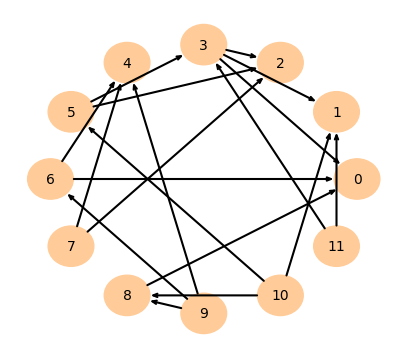

the results of this paper is: (with error rate: 16.1%)


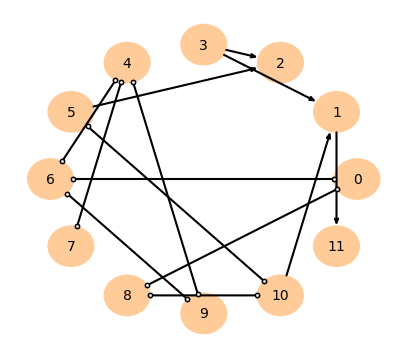

the results of Gong is: (with error rate: 28.6%)


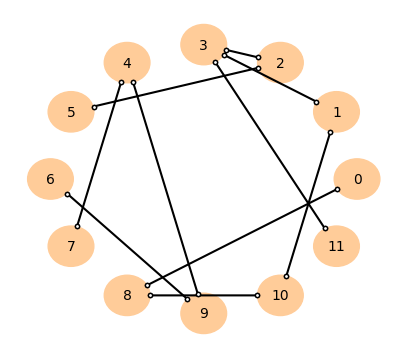

In [9]:




pathh=os.path.join(log_path,f"NodeSize:{num_nodes},EdgeSize:{len(edges_dict)}.pdf")

ground_true_graph=dag_to_graph_for(adjacency_matrix,edges_dict)

IC_1=np.linalg.inv(np.eye(adjacency_matrix.shape[0])-adjacency_matrix)
N_data=simulation(np.eye(adjacency_matrix.shape[0]),n).T
X_data=otimes(IC_1,N_data)
data_df=pd.DataFrame(X_data.T)


resultsThisPaper,_=method_this_paper(data_df)
resultsGong=ComparisonGong(data_df)

error_rate_this_paper,_=compare_graphs(resultsThisPaper,ground_true_graph)
error_rate_gong,_=compare_graphs(resultsGong,ground_true_graph)
print("the ground truth graph is:")
draw_graph(ground_true_graph)
print("the results of this paper is: (with error rate: {:.1f}%)".format(error_rate_this_paper*100))
draw_graph(resultsThisPaper)
print("the results of Gong is: (with error rate: {:.1f}%)".format(error_rate_gong*100))
draw_graph(resultsGong)